## <center>회귀분석 2 HW03</center>

**<p style="text-align:right;font-size:15px">202014107 <br> 통계학과 <br> 강신성</p>**

### CH09, 10, 11

`-` 데이터 및 라이브러리 불러오기

In [19]:
setwd("~/R/regression analysis/data/")
library(ggplot2)
library(lmtest)
options(repr.plot.width = 15, repr.plot.height = 8)
wine <- read.csv("wine38_2.csv")
dt1 <- read.csv("HW3_dt1.csv")
dt2 <- read.csv("HW3_dt2.csv")

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">  1. 피노 누아 와인의 품질은 투명도, 향, 바디, 맛, 오크향의 특성 그리고 지역과 관련이 있다고 생각된다. `wind38_2.csv` 파일은 38개 와인 데이터이다. Flavor와 Region변수를 이용하여 회귀 모형을 적합하려고 한다. 다음 물음에 답하여라. (주의 : Region 변수는 정수형 변수로 입력되어 있음.)</p>**

<p style="text-indent:15px">(1) 모형을 정의하여라. (회귀모형을 정의하고, 회귀모형에서 사용한 변수 설명 또는 정의)</p>

In [12]:
unique(wine$Region)

[1] 1 3 2

In [16]:
wine$Region = as.factor(wine$Region)
contrasts(wine$Region)

,2,3
1,0,0
2,1,0
3,0,1


> 위 관계를 바탕으로 회귀모형을 정의하면 아래와 같다.

$$\begin{align} & y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n \\ \\ 
    & y : Quanlity \\
    & x_1 : Flavor \\
    & x_2 = \begin{cases}
        1, ~ Region = 2 \\
        0, ~ Region \neq 2
    \end{cases} \\
    & x_3 = \begin{cases}
        1, ~ Region = 3 \\
        0, ~ Region \neq 3 \\
    \end{cases}
    \end{align}$$

<p style="text-indent:15px">(2) 회귀 모형을 적합하여라.</p>

In [18]:
wine_model <- lm(Quality~Flavor+Region, wine)
summary(wine_model)


Call:
lm(formula = Quality ~ Flavor + Region, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97630 -0.58844  0.02184  0.51572  1.94232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0943     0.7912   8.967 1.76e-10 ***
Flavor        1.1155     0.1738   6.417 2.49e-07 ***
Region2      -1.5335     0.3688  -4.158 0.000205 ***
Region3       1.2234     0.4003   3.056 0.004346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8946 on 34 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8087 
F-statistic: 53.13 on 3 and 34 DF,  p-value: 6.358e-13


`-` 적합된 회귀모형 : $\hat y = 7.0943 + 1.1155 x_1 - 1.5335 x_2 + 1.2234 x_3$

> F-statistics와 개별 회귀계수의 t-value에 대한 p-value가 모두 0.05보다 작으므로 통계적으로 유의미하다.

<p style="text-indent:15px">(3) 회귀 계수의 의미를 설명하여라.</p>

* $\beta_0 = 7.0943$ : 지역(Region) 1에서 생산한 와인은, Flavor가 0이면 품질은 7.0943이다.
* $\beta_1 = 1.1155$ : 지역 1에서 생산한 와인은, Flavor가 1만큼 증가하면 품질은 1.1155만큼 상승한다.
* $\beta_2 = -1.5335$ : 지역 2에서 생산한 와인은, 지역 1에서 생산한 것보다 평균적으로 품질이 1.5335만큼 낮다.
* $\beta_3 = 1.2234$ : 지역 3에서 생산한 와인은, 지역 1에서 생산한 것보다 평균적으로 품질이 1.2234만큼 높다.

<p style="text-indent:15px">(4) Region이 와인 품질에 영향을 미친다고 할 수 있는가?</p>

> Region에 따른 절편 변화값이 통계적으로 유의미하므로, 와인 품질에 영향을 미친다고 할 수 있다.

<p style="text-indent:15px">(5) 교호작용을 고려한 모델을 정의하여라.</p>

`-` Flavor와 Region간의 교호작용을 고려하면 아래와 같이 정의할 수 있다.

$$\begin{align} y_i = \beta_0 + & \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + \beta_{12} x_{i1} x_{i2} + \beta_{13} x_{i1} x_{i3} +  \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n \\ \\ 
    & y : Quanlity \\
    & x_1 : Flavor \\
    & x_2 = \begin{cases}
        1, ~ Region = 2 \\
        0, ~ Region \neq 2
    \end{cases} \\
    & x_3 = \begin{cases}
        1, ~ Region = 3 \\
        0, ~ Region \neq 3 \\
    \end{cases}
    \end{align}$$

<p style="padding-left:30px;text-indent:-15px">(6) 교호작용을 고려한 모델을 적합하고, 적합결과를 설명하여라. (1)의 모형보다 더 좋아졌다고 할 수 있는가?</p>

In [23]:
wine_model_interact <- lm(Quality~Flavor*Region, wine)
summary(wine_model_interact)


Call:
lm(formula = Quality ~ Flavor * Region, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.94964 -0.58463  0.04393  0.49607  1.97295 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.7311     1.1292   5.961 1.22e-06 ***
Flavor           1.1985     0.2532   4.733 4.31e-05 ***
Region2         -2.8942     2.1183  -1.366    0.181    
Region3          3.3833     2.0153   1.679    0.103    
Flavor:Region2   0.3108     0.4766   0.652    0.519    
Flavor:Region3  -0.4029     0.3878  -1.039    0.307    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8914 on 32 degrees of freedom
Multiple R-squared:  0.8357,	Adjusted R-squared:  0.8101 
F-statistic: 32.56 on 5 and 32 DF,  p-value: 1.179e-11


`-` 적합된 회귀모형 : $\hat y = 6.7311 + 1.1985 x_1 - 2.8942 x_2 + 3.3833 x_3 + 0.3108 x_1 x_2 - 0.4029 x_1 x_3$

적합 결과를 지역에 따라서 분류하면 아래와 같다.

* $\widehat{E(y|Region = 1)} = 6.7311 + 1.1985 x_1$
> 지역 1에서 생산된 와인은 Flavor가 0일 때 품질이 6.7311이고, Flavor가 1 증가할 때 품질은 1.1985만큼 높아진다.

* $\widehat{E(y|Region = 2)} = 6.7311 + 1.1985 x_1 - 2.8942 + 0.3108 x_1 = 3.8369 + 1.5093 x_1$
> 지역 2에서 생산된 와인은 Flavor가 0일 때 지역 1에서 생산된 와인보다 품질이 2.8942만큼 더 낮고, Flavor가 1증가할 때 높아지는 품질의 정도는 0.3108만큼 더 커진다.

* $\widehat{E(y|Region = 3)} = 6.7311 + 1.1985 x_1 + 3.3833 - 0.4029 x_1 = 10.1144 + 0.7956 x_1$
> 지역 3에서 생산된 와인은 Flavor가 0일 때 지역 1에서 생산된 와인보다 품질이 3.3833만큼 더 높고, Flavor가 1증가할 때 높아지는 품질의 정도는 0.4029만큼 더 작아진다.

<div class="alert alert-info">하지만 해당 모형의 경우 $\beta_0$와 $\beta_1$만 유의하고, 나머지 회귀계수는 유의하지 않게 산출되었기 때문에 위처럼 회귀계수를 해석하기 어렵다. 또한, (1)의 모형보다 수정된 결정계수는 조금 높아졌지만, 모형의 복잡도가 증가한 점과 회귀모형 자체의 p-value가 더 커졌다는 점에서 (1)의 모형보다 좋다고 말할 순 없다.</div>

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">  2. 위 문제에서 Region을 범주형 변수가 아닌 정수형 변수로 인식이 되었을 때의 차이는 무엇인지 회귀계수의 정의 및 적합 결과에 대하여 설명하여라.</p>**

$$\begin{align} & y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n \\ \\ 
    & y : Quanlity \\
    & x_1 : Flavor \\
    & x_2 ∈ \{1, 2, 3\}
    \end{align}$$

> Region이 정수로 인식될 경우, 각 집단별 적당한 기울기를 찾는 것이 아닌 $\beta_2$의 값에 따라 정렬된 순서만큼 계수가 할당되게 된다. 순서 없이 단순히 나열만 되었을 뿐인 명목형 자료를 정수로 받아들일 경우, 집단 간 차이가 뒤바뀌거나 전혀 다르게 추정될 수 있으며, 만약 순서가 있는 자료일지라도 계수가 균등하게 나뉘어 할당되므로 실제 집단을 구분했을 때의 결과와 다르게 된다.

In [34]:
wine_const <- read.csv("wine38_2.csv")
summary(lm(Quality~Flavor+Region, wine_const))


Call:
lm(formula = Quality ~ Flavor + Region, data = wine_const)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62893 -0.71797  0.06707  0.62091  2.26558 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0039     0.9855   5.078 1.27e-05 ***
Flavor        1.4267     0.2340   6.096 5.78e-07 ***
Region        0.3372     0.2749   1.227    0.228    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.262 on 35 degrees of freedom
Multiple R-squared:  0.6397,	Adjusted R-squared:  0.6191 
F-statistic: 31.07 on 2 and 35 DF,  p-value: 1.747e-08


`-` 적합된 회귀모형 : $\hat{y} = 5.0039 + 1.4267 x_1 + 0.3371 x_2$

In [35]:
summary(wine_model)


Call:
lm(formula = Quality ~ Flavor + Region, data = wine)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.97630 -0.58844  0.02184  0.51572  1.94232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.0943     0.7912   8.967 1.76e-10 ***
Flavor        1.1155     0.1738   6.417 2.49e-07 ***
Region2      -1.5335     0.3688  -4.158 0.000205 ***
Region3       1.2234     0.4003   3.056 0.004346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8946 on 34 degrees of freedom
Multiple R-squared:  0.8242,	Adjusted R-squared:  0.8087 
F-statistic: 53.13 on 3 and 34 DF,  p-value: 6.358e-13


> 위와 같이 자료형을 잘못 받아들여 적합한 회귀모형은 해당 설명변수가 유의하지 않게 됨과 동시에 모형의 설명력과 유의 정도도 상당히 떨어지며 RMSE 또한 높아졌다.

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">3. 아래의 데이터에 대하여 다음 물음에 답하시오.</p>**

|$x$|1|2|2|3|4|5|5|6|7|
|-|-|-|-|-|-|-|-|-|-|
|$y$|2.0|3.2|3.4|4.1|5.2|7.0|7.4|9.7|11.5|

<p style="padding-left:30px;text-indent:-15px">(1) $x$와 $y$에 대한 산점도를 그려보고, 어떤 $x$의 값($x_w$)에서 구간을 두 개로 나누면 적절할지 논하시오.</p>

In [38]:
dt <- data.frame(x = c(1,2,2,3,4,5,5,6,7),
                 y = c(2.0, 3.2, 3.4, 4.1, 5.2, 7.0, 7.4, 9.7, 11.5))

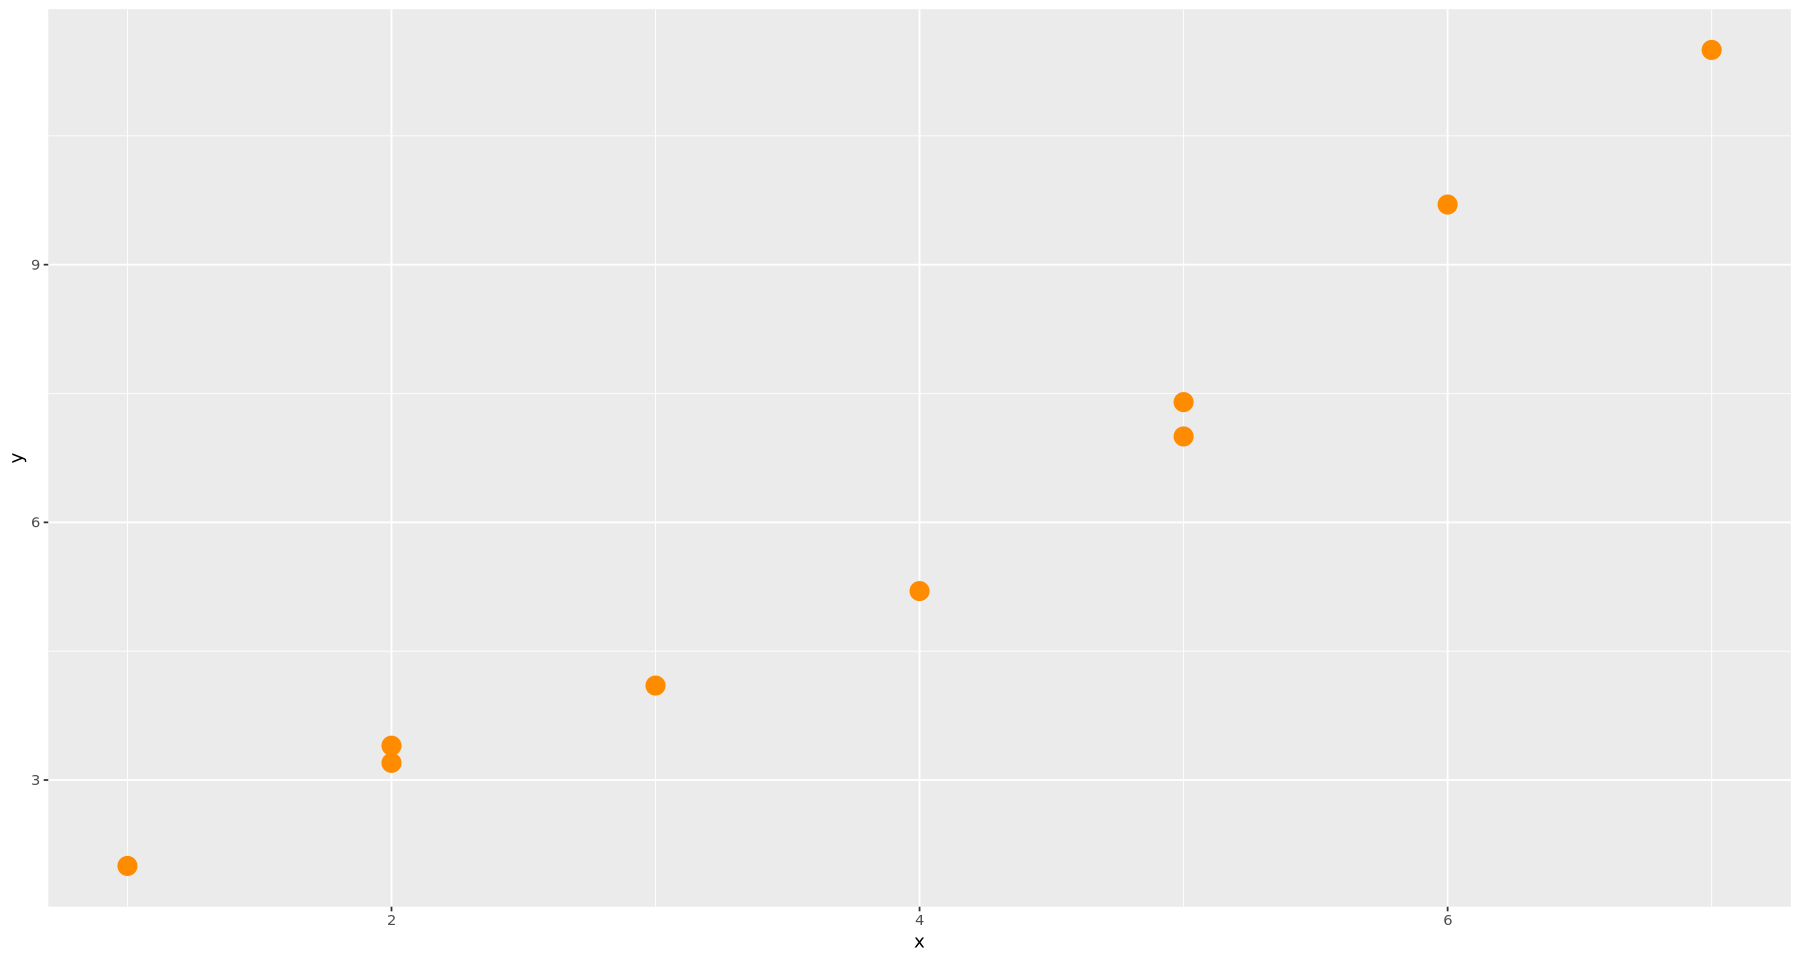

In [57]:
ggplot(dt, aes(x, y)) +
    geom_point(col = "darkorange", cex = 5) +
    theme_grey()

> 산점도가 4를 기준으로 기울기가 변화하는 추세인 것으로 볼 수 있다. 이에 따라 대충 직선을 그어보면 이를 확인해볼 수 있다.

In [58]:
dt

x,y
<dbl>,<dbl>
1,2.0
2,3.2
2,3.4
3,4.1
4,5.2
5,7.0
5,7.4
6,9.7
7,11.5


In [62]:
dt2 <- data.frame(x = c(1, 4, 7), 
                  y = c(2, 5.2, 11.5))

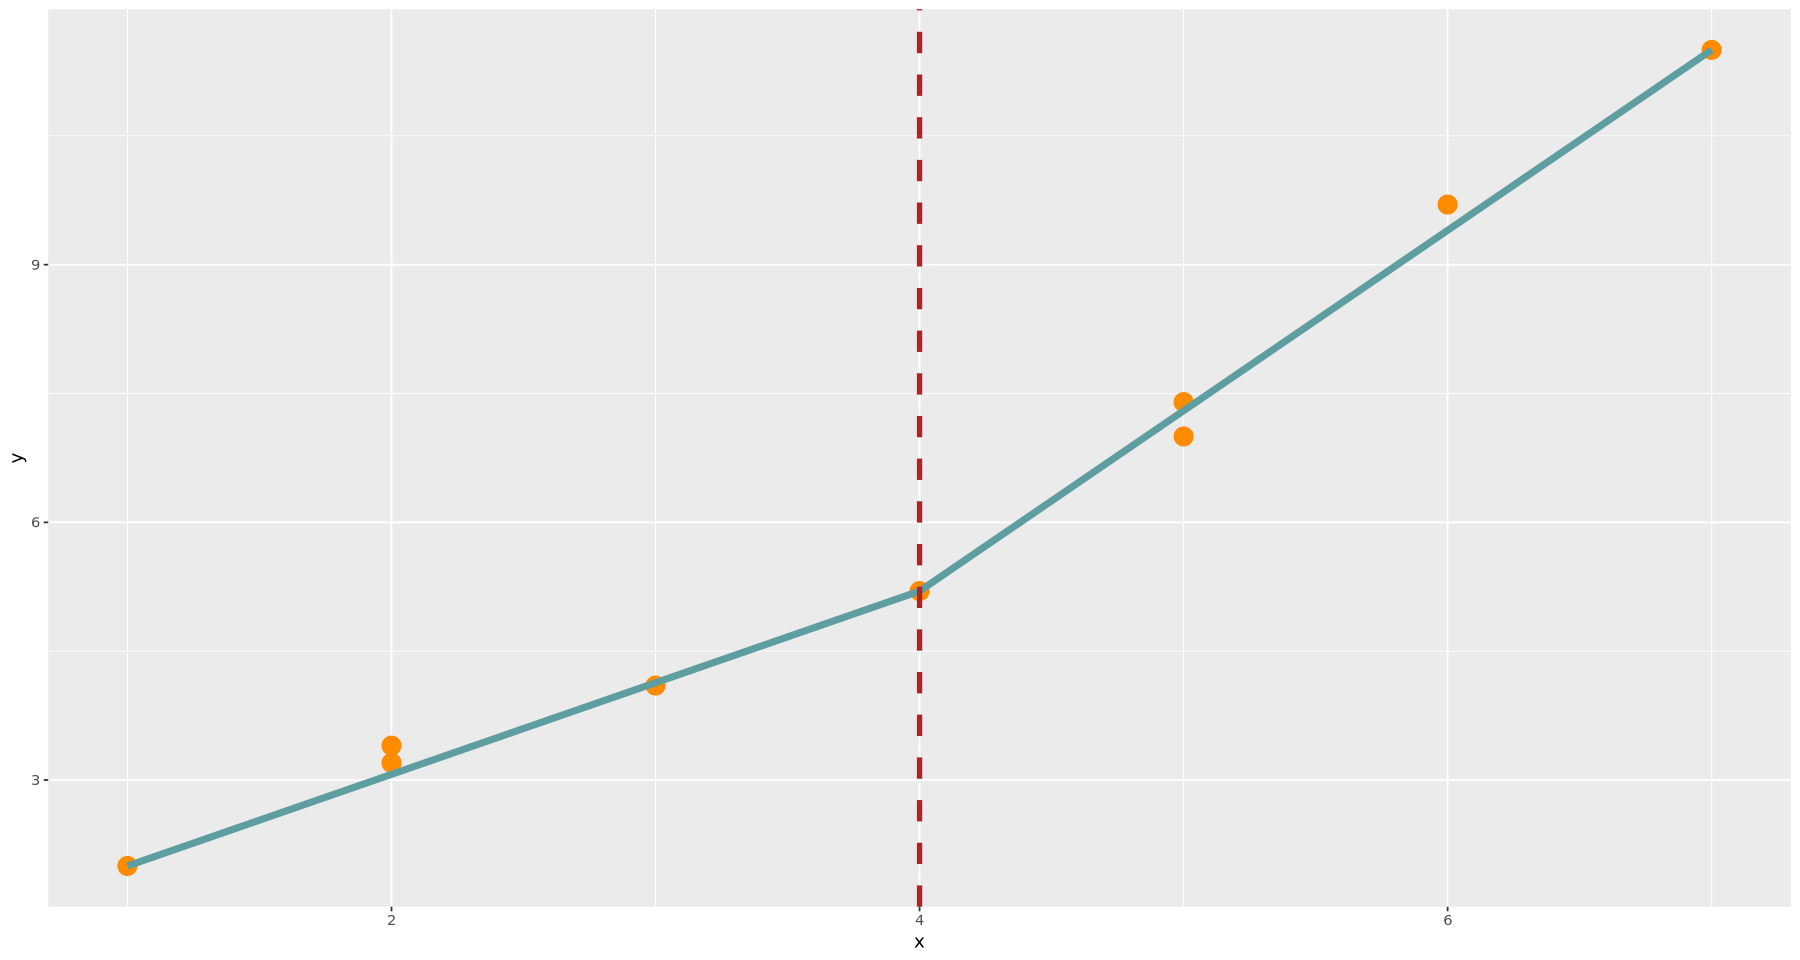

In [76]:
ggplot(dt, aes(x, y)) +
    geom_point(col = "darkorange", cex = 5) +
    theme_grey() +
    geom_line(aes(x, y), dt2, col = "cadetblue", lwd = 2) +
    geom_vline(xintercept = 4, col = "firebrick", lwd = 1.5, lty = 2)

<p style="padding-left:30px;text-indent:-15px">(2) 위의 (1)에서 얻은 점을 경계로 구간별 단순선형회귀선을 추정하시오. 사용되는 모형은 $$x_{i2} = \begin{cases}
            1, ~ x_{i1} > x_w\\
            0, ~ x_{i1} ≤ x_w
            \end{cases}$$
과 같다.
</p>

`-` 위와 같은 조건에서 $x_w = 4$이면, 구간별 단순선형회귀모형은 아래와 같이 정의할 수 있다.

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 (x_{i1} - 4) x_{i2} + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 1, 2, \cdots, n
$$

In [81]:
dt$x2 <- sapply(dt$x, function(x) {max(0, x - 4)})
dt

x,y,x2
<dbl>,<dbl>,<dbl>
1,2.0,0
2,3.2,0
2,3.4,0
3,4.1,0
4,5.2,0
5,7.0,1
5,7.4,1
6,9.7,2
7,11.5,3


`-` 위 데이터를 기반으로 단순선형회귀모형을 추정하면 다음과 같다.

In [83]:
model <- lm(y~., dt)
summary(model)


Call:
lm(formula = y ~ ., data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31361 -0.08980  0.02449  0.08639  0.24830 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.15238    0.22615   5.096 0.002231 ** 
x            1.00578    0.08007  12.561 1.56e-05 ***
x2           1.13231    0.14855   7.622 0.000266 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2094 on 6 degrees of freedom
Multiple R-squared:  0.9968,	Adjusted R-squared:  0.9957 
F-statistic: 929.1 on 2 and 6 DF,  p-value: 3.334e-08


추정된 회귀직선 : $\hat y = 1.15238 + 1.00578 x_1 + 1.13231 (x_1 - 4) x_2$

<p style="padding-left:30px;text-indent:-15px">(3) 위의 (2)에 있는 모형에서 $\beta_2$의 의미를 해석하고, 90% 신뢰구간을 구하여라.</p>

* $x_1$이 4 이상일 때, $x_1$이 $1$만큼 증가하면 $y$가 $\beta_1$에 더해서 $\beta_2$만큼 추가적으로 증가한다는 것을 의미한다. 해당 값의 신뢰구간은 아래와 같다.

In [92]:
confint(model, level = 0.9)

,5 %,95 %
(Intercept),0.7129292,1.591833
x,0.8501863,1.161378
x2,0.8436473,1.420979


In [93]:
print(paste("beta_2의 90% CI : (", confint(model, level = 0.9)[3, 1], ", ", confint(model, level = 0.9)[3,2], ")", sep = ""))

[1] "beta_2의 90% CI : (0.843647345609049, 1.42097850473109)"


**<p style="font-size:15px;text-indent:-15px;padding-left:15px">4. `HW3_dt1.csv`의 데이터를 이용하여 다음 물음에 답하여라.</p>**

<p style="padding-left:30px;text-indent:-15px">(1) 단순선형회귀모형을 적합하여라.</p>

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2)$$

In [96]:
dt1_model <- lm(y~x, dt1)
summary(dt1_model)


Call:
lm(formula = y ~ x, data = dt1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7748 -1.4084  0.1664  1.4368  3.0207 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -47.4207     3.0501  -15.55 2.48e-08 ***
x            17.6808     0.5176   34.16 1.09e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.213 on 10 degrees of freedom
Multiple R-squared:  0.9915,	Adjusted R-squared:  0.9907 
F-statistic:  1167 on 1 and 10 DF,  p-value: 1.093e-11


`-` 적합된 회귀모형 : $\hat y = -47.4207 + 17.6808 x$

<p style="padding-left:30px;text-indent:-15px">(2) 잔차 검정을 통해 모형의 적합성을 논의하여라.</p>

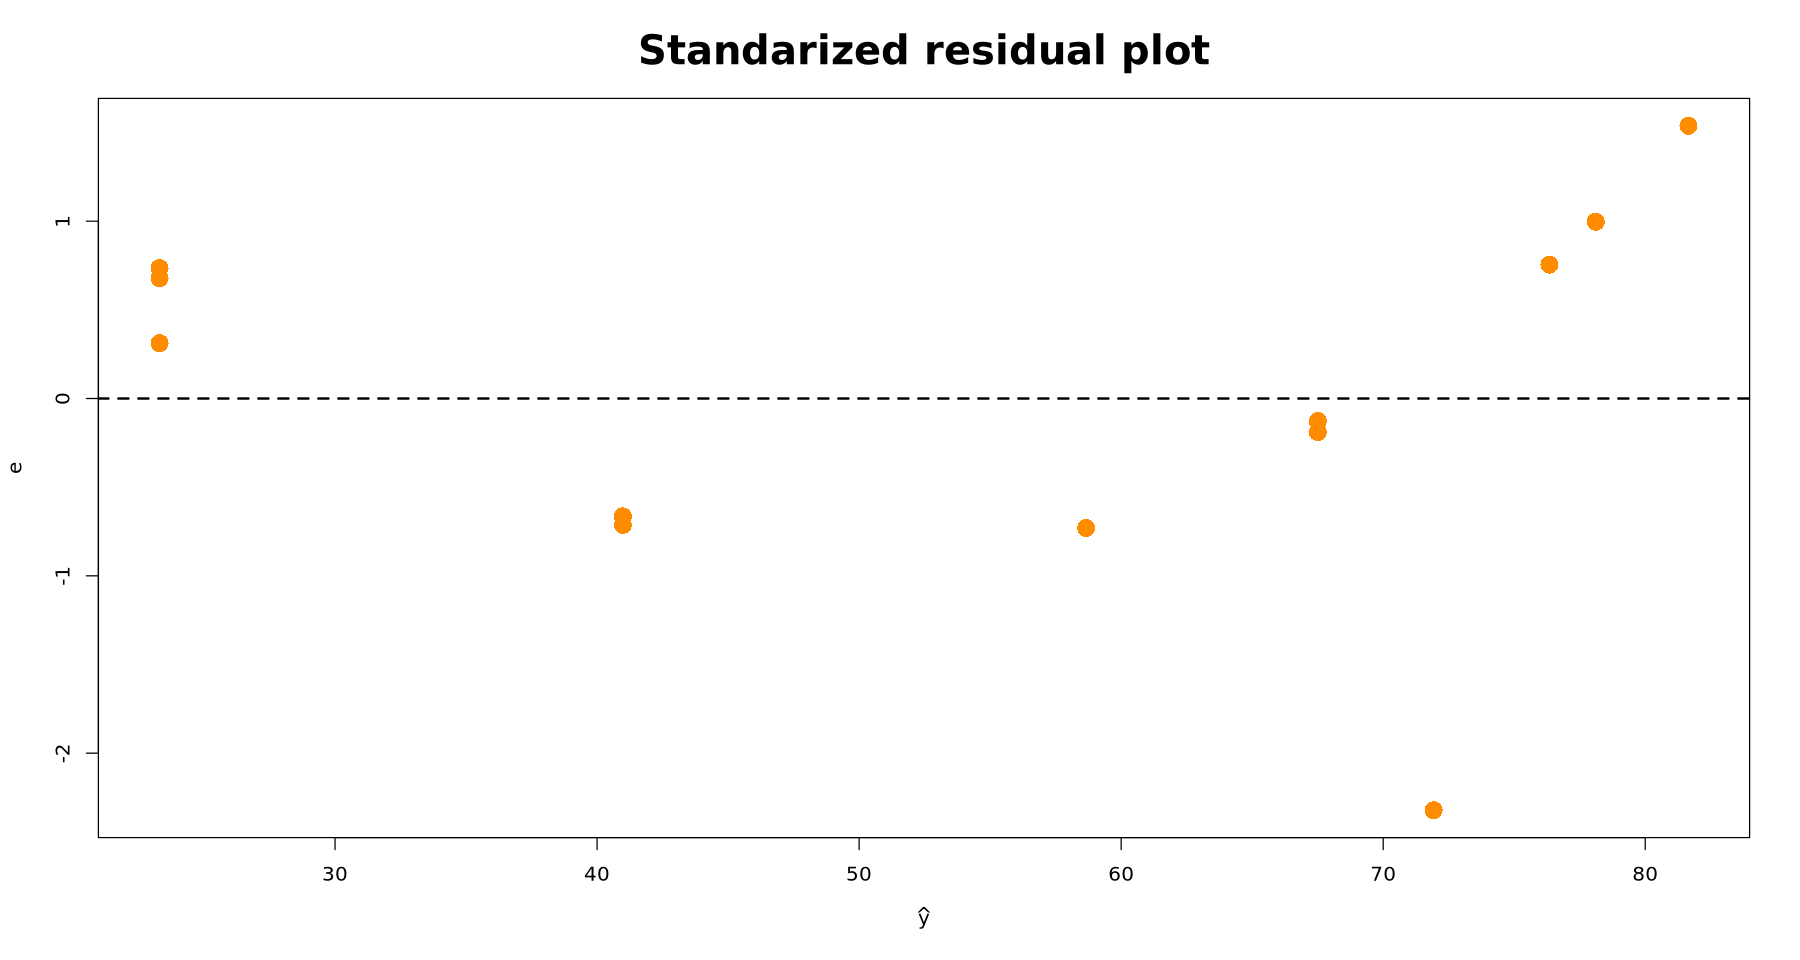

In [86]:
plot(predict(dt1_model), rstandard(dt1_model), pch = 16, col = "darkorange", cex = 2, xlab = expression(hat(y)), ylab = "e", main = "Standarized residual plot", cex.main = 2)
abline(h = 0, lty = 2, lwd = 2)

ⅰ) 선형성 : 0을 기준으로 위아래가 대칭인 개형이라고 보긴 어려울 것 같다. 또한 약간의 곡선이나 비선형 관계가 있어보인다.

ⅱ) 등분산성 : 이상치를 제외한다면, $\hat y$이 커진다고 해서 분산이 같이 커지거나 하진 않는 것 같다.

In [44]:
bptest(dt1_model)


	studentized Breusch-Pagan test

data:  dt1_model
BP = 1.8317, df = 1, p-value = 0.1759


bptest의 결과에서도 귀무가설을 기각할 수 없으므로 등분산성을 가정하는 데 무리가 없다.

ⅲ) 정규성 : 표준화된 잔차가 -3 이하인 값은 존재하지 않는다.

In [45]:
shapiro.test(dt1_model$residuals)


	Shapiro-Wilk normality test

data:  dt1_model$residuals
W = 0.93756, p-value = 0.4671


추가적으로 shapiro test 결과 정규성 가정을 위배하지 않는다고 말할 수 있다.

ⅳ) 독립성

In [21]:
dwtest(dt1_model, alternative = "two.sided")


	Durbin-Watson test

data:  dt1_model
DW = 1.3816, p-value = 0.1253
alternative hypothesis: true autocorrelation is not 0


Durbin-Watson 검정결과, 귀무가설을 기각할 수 없었으므로 오차 간 1차 자기상관은 없는 것으로 판단되어 독립성 가정에는 문제가 없다.

<div class="alert alert-info">따라서 선형회귀분석의 기본가정을 모두 충족하지 못하므로, 해당 회귀모형은 적합하지 한다.</div>

<p style="padding-left:30px;text-indent:-15px">(3) 위의 잔차 검정 결과를 이용하여 적절한 모형을 적합하여라.</p>

`-` 잔차 그림이 약간의 곡선 형태를 띄고 있는 것 같으므로, 먼저 2차항을 포함한 다항회귀를 진행해보면 다음과 같다.

In [46]:
dt1_poly <- lm(y~x+I(x^2), dt1)
summary(dt1_poly)


Call:
lm(formula = y ~ x + I(x^2), data = dt1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5729  0.1344  0.4641  0.7315  0.8495 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -4.4595    14.6343  -0.305   0.7675  
x             1.3837     5.4971   0.252   0.8069  
I(x^2)        1.4670     0.4936   2.972   0.0156 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.657 on 9 degrees of freedom
Multiple R-squared:  0.9957,	Adjusted R-squared:  0.9948 
F-statistic:  1045 on 2 and 9 DF,  p-value: 2.213e-11


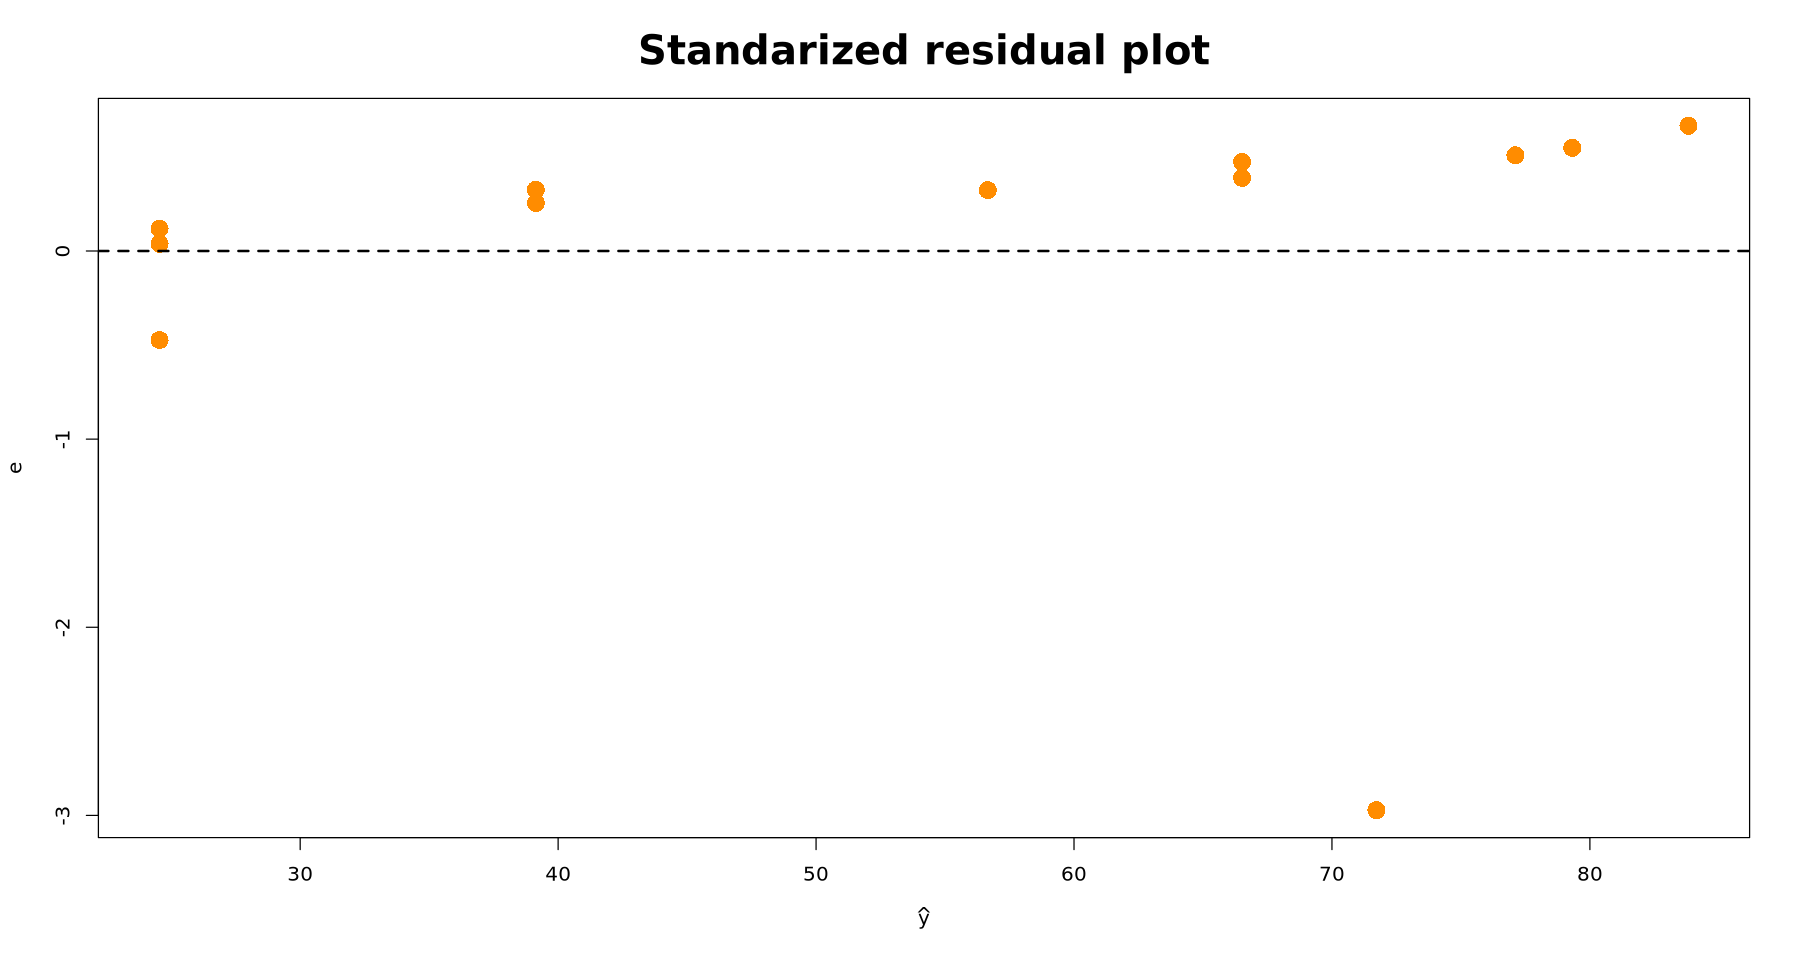

In [107]:
plot(predict(dt1_poly), rstandard(dt1_poly), pch = 16, col = "darkorange", cex = 2, xlab = expression(hat(y)), ylab = "e", main = "Standarized residual plot", cex.main = 2)
abline(h = 0, lty = 2, lwd = 2)

> 대칭이 아니고 위로 치우쳐진 회귀모형이 나왔다.

In [112]:
shapiro.test(resid(dt1_poly))


	Shapiro-Wilk normality test

data:  resid(dt1_poly)
W = 0.56068, p-value = 5.139e-05


> 샤피로 검정 결과, 정규분포를 따르지 않는다고 말할 수 있다. 해당 자료에서 이상치를 제거한다면 선형회귀모형의 기본가정을 따르게 할 수 있을 것으로 예상된다.

`-` 이상치를 제거하고 모형을 적합

In [98]:
dt1_rm_out <- dt1[!(abs(rstandard(dt1_model)) > 2),]
dt1_rm_model <- lm(y~x, dt1_rm_out)
summary(dt1_rm_model)


Call:
lm(formula = y ~ x, data = dt1_rm_out)

Residuals:
   Min     1Q Median     3Q    Max 
-2.076 -1.346  0.663  1.250  2.101 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.6809     2.2170  -21.96 3.98e-09 ***
x            17.9795     0.3816   47.11 4.38e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.584 on 9 degrees of freedom
Multiple R-squared:  0.996,	Adjusted R-squared:  0.9955 
F-statistic:  2219 on 1 and 9 DF,  p-value: 4.381e-12


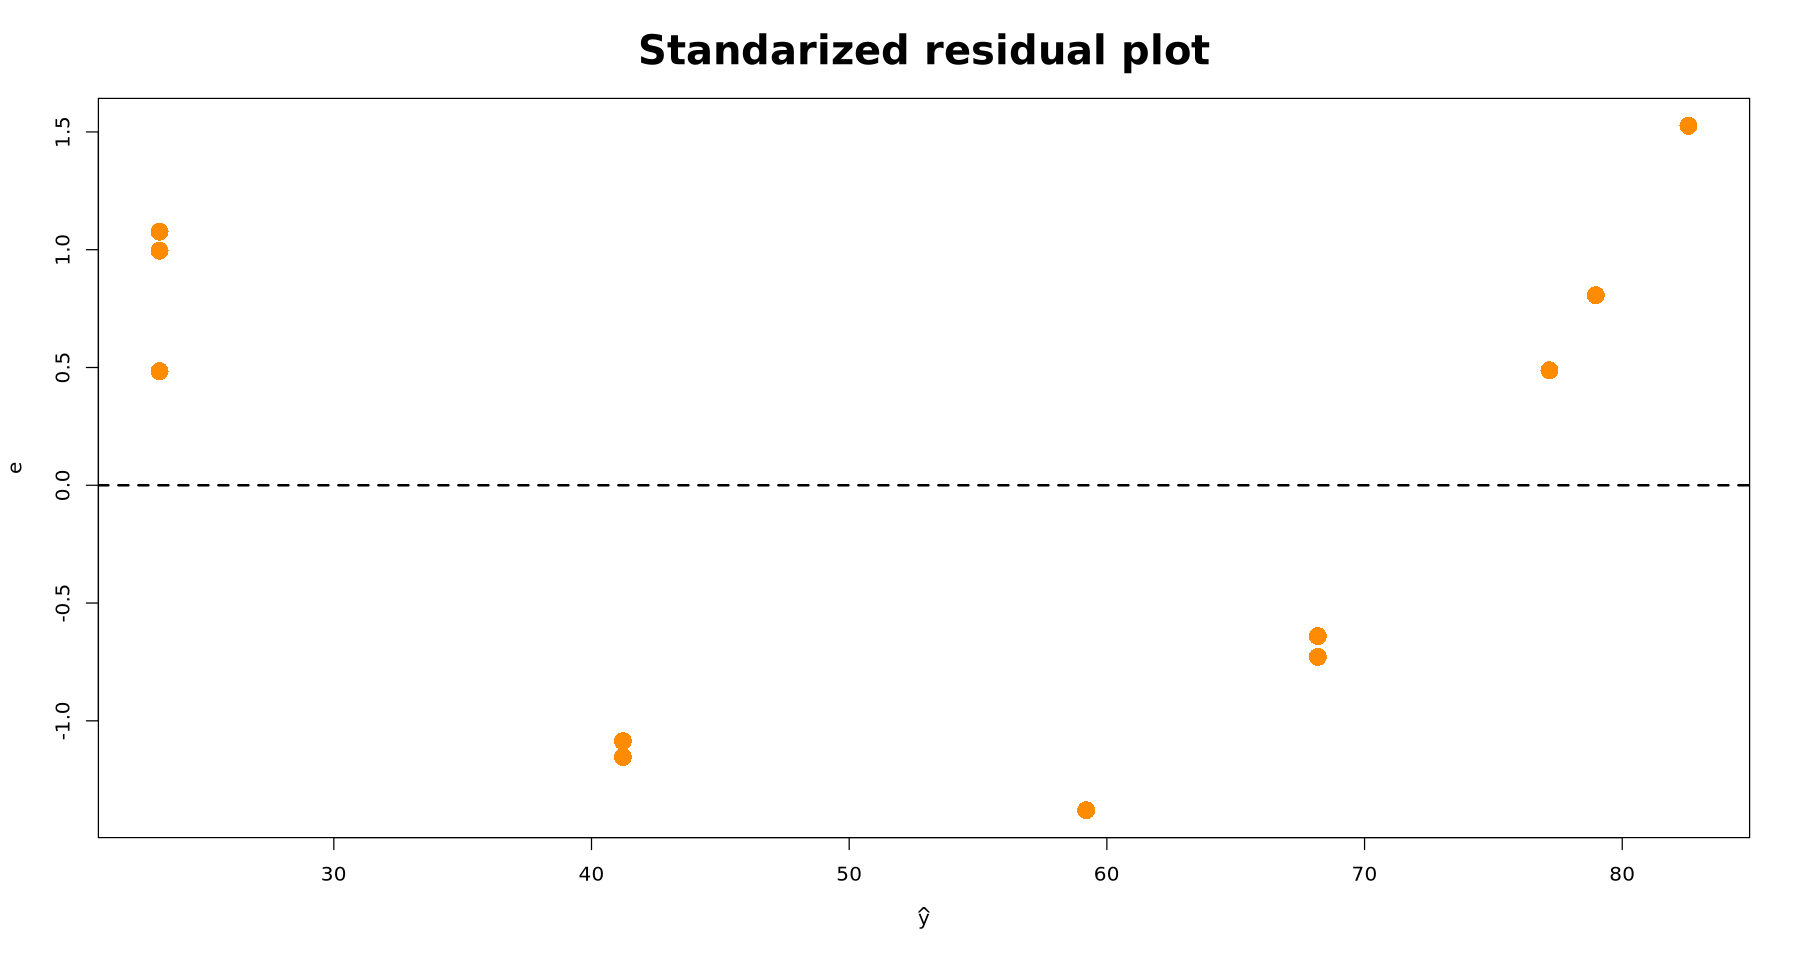

In [99]:
plot(predict(dt1_rm_model), rstandard(dt1_rm_model), pch = 16, col = "darkorange", cex = 2, xlab = expression(hat(y)), ylab = "e", main = "Standarized residual plot", cex.main = 2)
abline(h = 0, lty = 2, lwd = 2)

> 이상치를 제거했더니 잔차 그림이 곡선 형태로 나타났다. 따라서 이상치를 제거하고, 다항회귀로 모형을 구성하는 것이 가장 적절한 모형이 될 것으로 예상된다.

`-` 이상치 제거 & 다항회귀

$$y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \epsilon, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2)$$

In [104]:
dt1_rm_poly <- lm(y~x+I(x^2), dt1_rm_out)
summary(dt1_rm_poly)


Call:
lm(formula = y ~ x + I(x^2), data = dt1_rm_out)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53022 -0.05474  0.02539  0.11092  0.27978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.56617    2.10283  -3.598   0.0070 ** 
x            2.39007    0.78937   3.028   0.0164 *  
I(x^2)       1.40226    0.07082  19.801 4.41e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2375 on 8 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 4.953e+04 on 2 and 8 DF,  p-value: < 2.2e-16


`-` 적합된 회귀모형 : $\hat y = -7.56617 + 2.39007 x + 1.40226 x^2$

<p style="padding-left:30px;text-indent:-15px">(4) (3)의 모형의 회귀계수에 대한 유의성 검정을 수행하여라.</p>

In [106]:
summary(dt1_rm_poly)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-7.566168,2.10283370,-3.598082,7.001775e-03
x,2.390074,0.78937497,3.027806,1.636394e-02
I(x^2),1.402255,0.07081672,19.801192,4.406593e-08


`-` $\beta_0$에 대한 유의성 검정

ⅰ) 가설 $H_0 : \beta_0 = 0, ~ vs. ~ H_1 : \beta_0 \neq 0$

ⅱ) 검정통계량

$$T = \frac{\hat{\beta_0}}{\hat{\sigma_{\hat{\beta_0}}}} \sim_{H_0} t(8)$$

ⅲ) $t = -3.598082, p-value = 0.007 < 0.05$

따라서 유의수준 $\alpha = 0.05$에서 귀무가설을 기각하고 대립가설을 수용한다. 즉, $\beta_0$는 유의하다.

`-` $\beta_1, \beta_2$의 경우

위와 동일한 방법으로 구해진 $p-value$를 테이블에서 구하면 전부 유의수준 $\alpha = 0.05$보다 작으므로 모든 회귀계수는 유의하다.

<p style="padding-left:30px;text-indent:-15px">(5) (3)의 모형에 대하여 잔차검정을 통해 모형의 적합성을 논의하여라.</p>

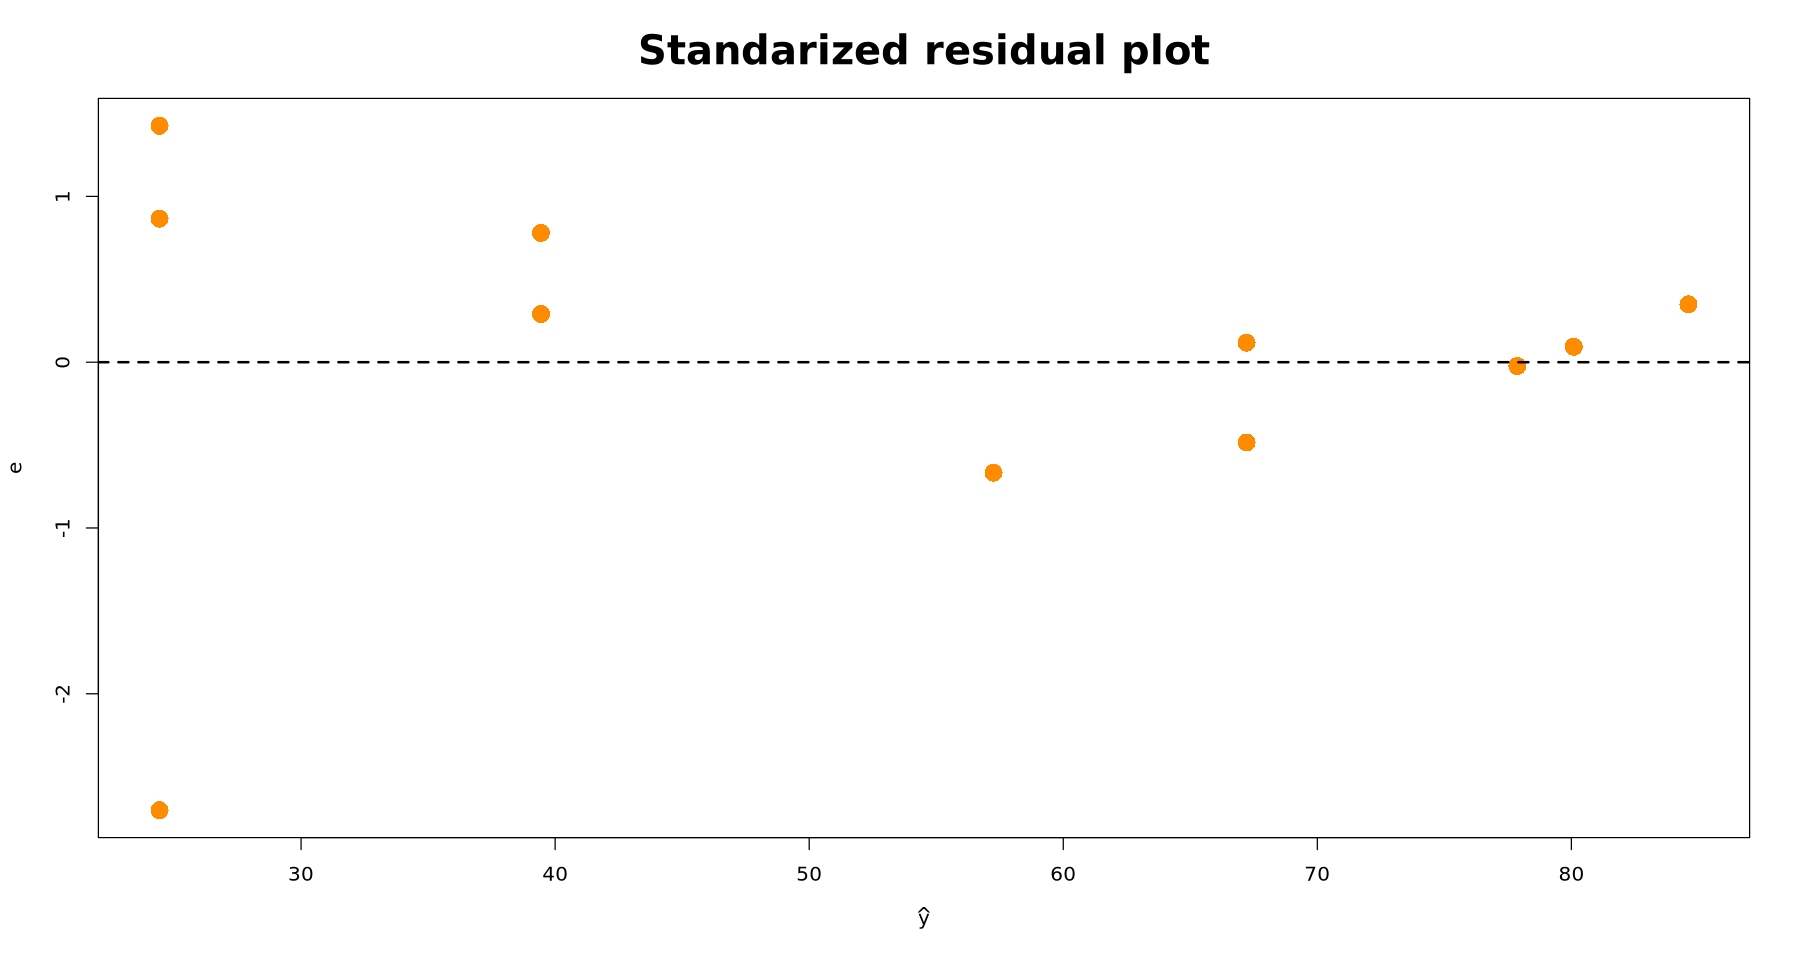

In [108]:
plot(predict(dt1_rm_poly), rstandard(dt1_rm_poly), pch = 16, col = "darkorange", cex = 2, xlab = expression(hat(y)), ylab = "e", main = "Standarized residual plot", cex.main = 2)
abline(h = 0, lty = 2, lwd = 2)

ⅰ) 선형성 : 0을 기준으로 거의 대칭이므로 선형성을 위배하지 않는다.

ⅱ) 등분산성 : 오차의 범위가 $\hat y$의 값에 따라 변하지 않는 것 같다.

In [113]:
bptest(dt1_rm_poly)


	studentized Breusch-Pagan test

data:  dt1_rm_poly
BP = 4.9007, df = 2, p-value = 0.08626


> 유의수준 $\alpha = 0.05$에서 오차는 등분산이라는 가설을 기각할 수 없다.

ⅲ) 정규성 : 표준화된 잔차가 -3을 넘어가는 값이 존재하지 않으므로, 정규성 가정에는 문제가 없다.

In [114]:
shapiro.test(resid(dt1_rm_poly))


	Shapiro-Wilk normality test

data:  resid(dt1_rm_poly)
W = 0.87078, p-value = 0.07933


> 유의수준 $\alpha = 0.05$에서 오차가 정규분포를 따른다는 가설을 기각할 수 없다.

ⅳ) 독립성

In [117]:
dwtest(dt1_rm_poly, alternative = "two.sided")


	Durbin-Watson test

data:  dt1_rm_poly
DW = 2.5123, p-value = 0.86
alternative hypothesis: true autocorrelation is not 0


> 더빈-왓슨 검정 결과, 잔차의 1차 자기상관이 없다는 귀무가설을 기각할 수 없었다. 따라서 독립성 가정에도 문제가 없다.

<div class="alert alert-info">따라서, 해당 선형회귀모형은 적합하다.</div>

**<p style="font-size:15px;text-indent:-15px;padding-left:15px">5. `HW3_dt2.csv`는 화장품 제조업체 월별 판매량($y$)과 전체 산업의 해당 월별 판매량($x$) 데이터이다. (단위 : 백만 달러) 다음 물음에 답하여라.</p>**

<p style="padding-left:30px;text-indent:-15px">(1) 단순선형회귀모형을 적합하여라.</p>

$$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, ~ \epsilon_i \overset{i.i.d}{\sim} N(0, \sigma^2)$$

In [119]:
dt2_model <- lm(y~x, dt2)
summary(dt2_model)


Call:
lm(formula = y ~ x, data = dt2)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0235865 -0.0151847 -0.0000263  0.0142397  0.0240685 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.162107   0.035849  -32.42 5.06e-16 ***
x            0.293350   0.005966   49.17  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01644 on 16 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.993 
F-statistic:  2418 on 1 and 16 DF,  p-value: < 2.2e-16


`-` 적합된 회귀모형 : $\hat y = -1.162107 + 0.293350 x$

<p style="padding-left:30px;text-indent:-15px">(2) 잔차검정을 통해 모형의 적합성을 논의하여라.</p>

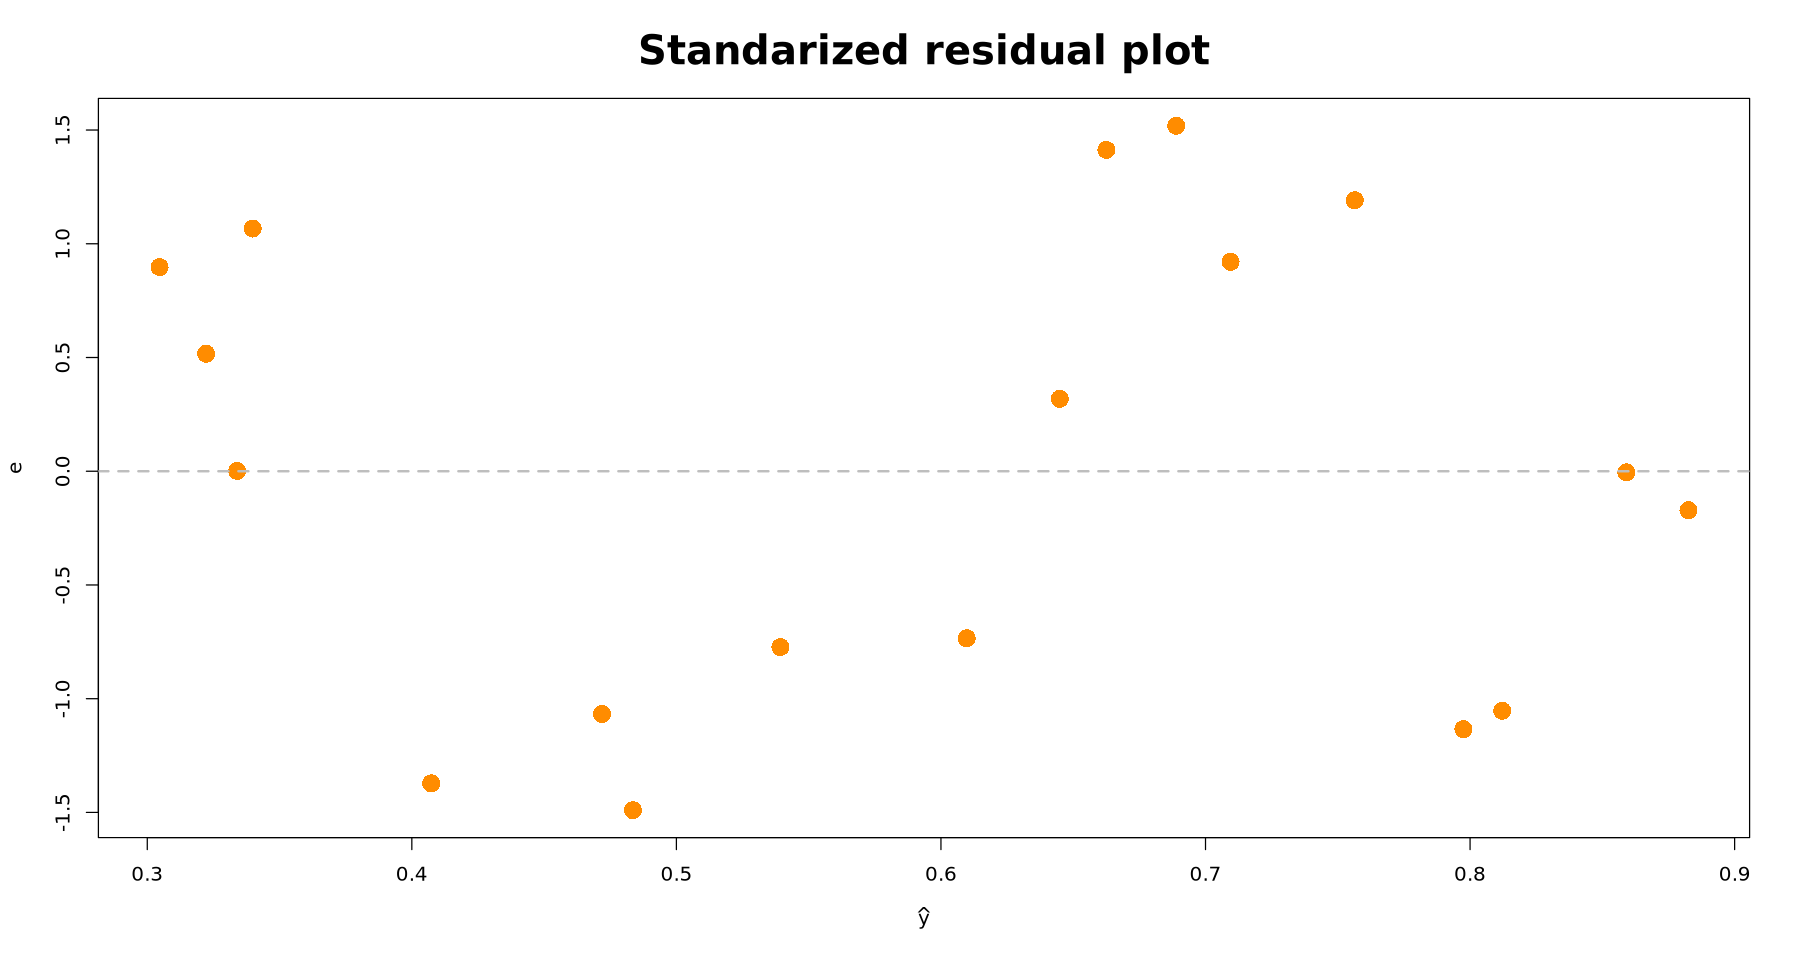

In [126]:
plot(predict(dt2_model), rstandard(dt2_model),
     pch = 16, cex = 2, col = "darkorange",
     xlab = expression(hat(y)), ylab = "e", main = "Standarized residual plot", cex.main = 2)
abline(h = 0, lwd = 2, lty = 2, col = "grey")

ⅰ) 선형성 : 3차 다항식과 같은 관계가 나타날 수도 있겠으나, 표준화된 잔차 그림이 0을 기준으로 어느정도는 대칭인 것으로 보인다.

ⅱ) 등분산성 : $\hat y$의 값이 커져도 잔차의 범위가 넓어지거나 하진 않아보인다. 따라서 등분산성 가정에는 문제가 없다.

In [127]:
bptest(dt2_model)


	studentized Breusch-Pagan test

data:  dt2_model
BP = 0.0078249, df = 1, p-value = 0.9295


ⅲ) 정규성 : 표준화된 잔차 중 그 절대값이 2 이상인 것은 존재하지 않는다. 따라서 정규성 가정에는 문제가 없다.

In [128]:
shapiro.test(resid(dt2_model))


	Shapiro-Wilk normality test

data:  resid(dt2_model)
W = 0.9292, p-value = 0.188


ⅳ) 독립성 : 잔차 그림이 $\hat y$의 값의 범위에 대하여 잔차가 양수면 양수끼리 몰려있고, 음수면 음수끼리 몰려있는 경향이 관찰된다. 따라서 잔차의 1차 양의 자기상관이 있는 것으로 추정되어 독립성 가정이 의심된다.

<div class="alert alert-info">위 결과에 따라 적합된 회귀모형의 적합성은 독립성의 성립 여부에 따라 재고해야할 가치가 있는 것으로 보인다.</div>

<p style="padding-left:30px;text-indent:-15px">(3) Durbin-Watson 검정을 통해, 오차간의 1차 자기상관이 있는지를 검정하여라.</p>

In [130]:
dwtest(dt2_model, alternative = "two.sided")


	Durbin-Watson test

data:  dt2_model
DW = 0.75686, p-value = 0.000733
alternative hypothesis: true autocorrelation is not 0


> 더빈-왓슨 검정 결과, 오차간 1차 자기상관이 없다는 귀무가설을 기각한다. 이 경우 통계량이 0에 가까우므로, 오차는 양의 1차 자기상관이 있는 것으로 생각할 수 있다.

<p style="padding-left:30px;text-indent:-15px">(4) 적당한 변수 변환을 통해 모형을 적합하여라.</p>

`-` 먼저 단순선형회귀에서의 결과를 통해 잔차의 1차 자기상관에 대한 표본상관계수를 산출해보자.

$$\begin{align}\hat{\rho} & = \frac{\displaystyle\sum_{i = 2}^{n} (e_{i-1} - \bar{e}_1)(e_i - \bar{e}_2)}{\displaystyle\sum_{i = 2}^{n}(e_{i-1} - \bar{e_1})^2}\\ \\
& \bar{e}_1 = \frac{1}{n-1}\displaystyle\sum_{i = 2}^{n}e_{i-1} \\
& \bar{e}_2 = \frac{1}{n-1}\displaystyle\sum_{i = 2}^{n}e_{i}
\end{align}$$

In [133]:
length(resid(dt2_model))

[1] 18

In [138]:
e_1 <- resid(dt2_model)[-1]
e_2 <- resid(dt2_model)[-18]

rho_hat <- sum((e_1 - mean(e_1))*(e_2 - mean(e_2)))/(sum((e_1 - mean(e_1))^2))
rho_hat

[1] 0.6280985

`-` 그러면, 이제 $y$와 $x$를 변환하여 잔차의 1차 자기상관에 해당하는 추세를 없애줄 수 있다.

$$\begin{align} y_i' & = y_i - \hat{\rho} y_{i-1} \Rightarrow y_i' = \beta_0 + \beta_1 x_i + \epsilon_i - \hat{\rho}(\beta_0 + \beta_1 x_{i-1} + \epsilon_{i-1}) \Rightarrow y_i' = \beta_0' + \beta_1 (x_i - \hat{\rho} x_{i-1}) + \epsilon', \epsilon' \overset{i.i.d}{\sim} N(0, \sigma^2), ~ i = 2, 3, \cdots, n \\ \\
x_i' & = x_i - \hat{\rho} x_{i-1}
\end{align}$$

In [140]:
x_t <- dt2$x[-1] - rho_hat*dt2$x[-18]
y_t <- dt2$y[-1] - rho_hat*dt2$y[-18]

In [141]:
dt2_model_trans <- lm(y_t~x_t)
summary(dt2_model_trans)


Call:
lm(formula = y_t ~ x_t)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0295400 -0.0053652 -0.0002024  0.0092768  0.0199910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.44451    0.03063  -14.51  3.1e-10 ***
x_t          0.29829    0.01316   22.67  5.1e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01304 on 15 degrees of freedom
Multiple R-squared:  0.9716,	Adjusted R-squared:  0.9698 
F-statistic:   514 on 1 and 15 DF,  p-value: 5.095e-13


`-` 적합된 회귀모형 : $\hat y = -0.44451 + 0.29829 x$

<p style="padding-left:30px;text-indent:-15px">(5) (4)의 모형에 대하여 Durbin-Watson 검정을 통해, 오차간의 1차 자기상관이 있는지를 검정하여라.</p>

In [143]:
dwtest(dt2_model_trans, alternative = "two.sided")


	Durbin-Watson test

data:  dt2_model_trans
DW = 1.7538, p-value = 0.4257
alternative hypothesis: true autocorrelation is not 0


> 더빈-왓슨 검정 결과, 적당한 변수 변환을 거친 모형에서는 오차간의 1차 자기상관이 존재하지 않았다.

<p style="padding-left:30px;text-indent:-15px">(6) 모형 (1)에 의해서 구해진 최소제곱추정량과 모형 (4)에서 구한 최소제곱추정량의 표준오차를 비교하여라.</p>

In [153]:
print(paste("모형 (1)에 의해서 구해진 최소제곱추정량의 표준오차(RMSE) : ", round(summary(dt2_model)$sigma, 6)))
print(paste("모형 (4)에 의해서 구해진 최소제곱추정량의 표준오차(RMSE) : ", round(summary(dt2_model_trans)$sigma, 6)))

[1] "모형 (1)에 의해서 구해진 최소제곱추정량의 표준오차(RMSE) :  0.016437"
[1] "모형 (4)에 의해서 구해진 최소제곱추정량의 표준오차(RMSE) :  0.013041"


> 모형 (4)에서 구한 최소제곱추정량의 표준오차가 더 작음을 알 수 있다.